# Table of Contents
 <p><div class="lev1"><a href="#Fitting-GP"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fitting GP</a></div><div class="lev1"><a href="#Fitting-hyperparameters"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fitting hyperparameters</a></div><div class="lev2"><a href="#Fit-variogram"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fit variogram</a></div><div class="lev2"><a href="#Likelihood-fit"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Likelihood fit</a></div><div class="lev2"><a href="#Full-Bayesian"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Full Bayesian</a></div>

In [1]:
library(geoR)

--------------------------------------------------------------
 Analysis of Geostatistical Data
 For an Introduction to geoR go to http://www.leg.ufpr.br/geoR
 geoR version 1.7-5.2 (built on 2016-05-02) is now loaded
--------------------------------------------------------------



In [2]:
Tucson_sales=read.csv("Tucson_data/processed/Tucson_sales.csv")
Tucson_sales

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋱"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): 

,X,ADDRESS,ADPARCEL_,ADPARCEL_I,ADR_ID,AD_STREET,AD_SUFFIX,ANGLE,AREA,CITY_ID,ellip.h,Financing,ValidationDescription,BuyerSellerRelated,Solar,PersonalProperty,PartialInterest,RecordingDate,SchDistr,X_PRJ,Y_PRJ
1,10120025B,5141 N CASA GRANDE HY,103086,296800,295994,CASA GRANDE,HY,0,0,TUC,⋯,Other,Good Sale,No,No,No,No,2015-01-30,Flowing Wells Unified District,772027.252493457,474087.024228124
2,101211280,5201 N GRACIOUS CT,102090,297808,296996,GRACIOUS,CT,0,0,TUC,⋯,Other,Good Sale,No,No,No,No,2015-04-30,Flowing Wells Unified District,768163.863592084,474526.9936704
3,101211330,5111 N GRACIOUS CT,103906,295971,295165,GRACIOUS,CT,0,0,TUC,⋯,Other,Improvements not yet on assessment roll,No,No,No,No,2015-10-21,Flowing Wells Unified District,767992.904413181,473773.098323779
4,101211350,5120 N GRACIOUS CT,103781,296100,295296,GRACIOUS,CT,0,0,TUC,⋯,Other,Good Sale,No,No,No,No,2015-12-11,Flowing Wells Unified District,768197.34134571,473820.661467114
5,101211360,5130 N GRACIOUS CT,103539,296345,295539,GRACIOUS,CT,0,0,TUC,⋯,Other,Good Sale,No,No,No,No,2015-06-30,Flowing Wells Unified District,768209.65723659,473928.128635306
6,101211390,5160 N GRACIOUS CT,102733,297158,296351,GRACIOUS,CT,0,0,TUC,⋯,Other,Good Sale,No,No,No,No,2015-04-27,Flowing Wells Unified District,768192.041755862,474229.310991344
7,101211430,5013 N WILD LIFE DR,105035,294835,294022,WILD LIFE,DR,0,0,TUC,⋯,Other,Good Sale,No,No,No,No,2015-12-30,Flowing Wells Unified District,768227.263404589,473327.4819677
8,101233610,3659 W COURTNEY CROSSING LN,88828,311297,310419,COURTNEY CROSSING,LN,0,0,TUC,⋯,Other,Good Sale,No,No,No,No,2015-08-14,Flowing Wells Unified District,769960.978577967,480598.46710545
9,101233860,3514 W ETHAN CROSSING LN,87666,312471,311594,ETHAN CROSSING,LN,0,0,TUC,⋯,Other,Good Sale,No,No,No,No,2015-03-16,Flowing Wells Unified District,770872.549438164,481041.683299835
10,101233870,3521 W ETHAN CROSSING LN,88121,312007,311130,ETHAN CROSSING,LN,0,0,TUC,⋯,Other,Good Sale,No,No,No,No,2015-10-30,Flowing Wells Unified District,770816.668853836,480857.686057385


In [4]:
levels(Tucson_sales$ValidationDescription)

[1] ""                                                                      
 [2] "Buyer/Seller are related parties or corporate entities"                
 [3] "Buyer/Seller has an Out-Of-State Address"                              
 [4] "Buyer/Seller is a Non-Profit institution"                              
 [5] "Correction of previously recorded deed                 "               
 [6] "Developers discount/value by Land manual"                              
 [7] "Good Sale"                                                             
 [8] "Improvements not yet on assessment roll"                               
 [9] "Internet sale"                                                         
[10] "More than five (5) parcels being sold"                                 
[11] "Name/Address of Buyer or Seller is missing"                            
[12] "Property altered since date of sale"                                   
[13] "Property type/use code are not consistent"                             
[14] "Sale by subsidiary corp. to parent corp.                              "
[15] "Sale includes quantifiable Personal Property > 5%"                     
[16] "Sale includes unquantifiable Personal Property > 5%"                   
[17] "Sale of partial interest"                                              
[18] "Sale price missing"                                                    
[19] "Sale pursuant to a court order"                                        
[20] "Sale to or from a government agency"                                   
[21] "Sale under duress"                                                     
[22] "Unknown"                                                               
[23] "Unsecured Mobile Home"                                                 
[24] "Unusable sale which does not fit any other reject codes"

In [10]:
believable = (
    Tucson_sales$ValidationDescription %in% c("Good Sale")
    & Tucson_sales$PropertyType %in% c("2-4 Plex", "Condo/Townhouse", "Single Family")
    & Tucson_sales$BuyerSellerRelated == "No"
    & Tucson_sales$PartialInterest == "No"
)

In [21]:
schdistrs = levels(Tucson_sales$SchDistr)
print(schdistrs)

[1] "Amphitheater Unified District"  "Flowing Wells Unified District"
[3] "Sunnyside Unified District"     "Tanque Verde Unified District" 
[5] "Tucson Unified District"        "Vail Unified District"         


# Fitting GP

In [29]:
require(MASS)

Loading required package: MASS


In [75]:
for_geodata = Tucson_sales[believable,c("X_PRJ","Y_PRJ","SalePrice","SchDistr")]
for_geodata$logSalePrice = log(for_geodata$SalePrice)
for_geodata$iSchDistr = as.numeric(for_geodata$SchDistr)
# I feel like we shouldn't need to do this:
for_geodata[,c("X_PRJ","Y_PRJ")] = jitterDupCoords(for_geodata[,c("X_PRJ","Y_PRJ")], max=10, min=1)

In [76]:
print(colnames(for_geodata))

[1] "X_PRJ"        "Y_PRJ"        "SalePrice"    "SchDistr"     "logSalePrice"
[6] "iSchDistr"   


In [77]:
Tucson_geodata=as.geodata(for_geodata, 
    coords.col=c(1,2), 
    data.col=5, 
    realisations=6, 
    rep.data.action="first" # why can't we have repeated locations?
    )

In [91]:
Tucson.variog = variog(Tucson_geodata, pairs.min=20, breaks=seq(0,100000,1000))

variog: computing omnidirectional variogram


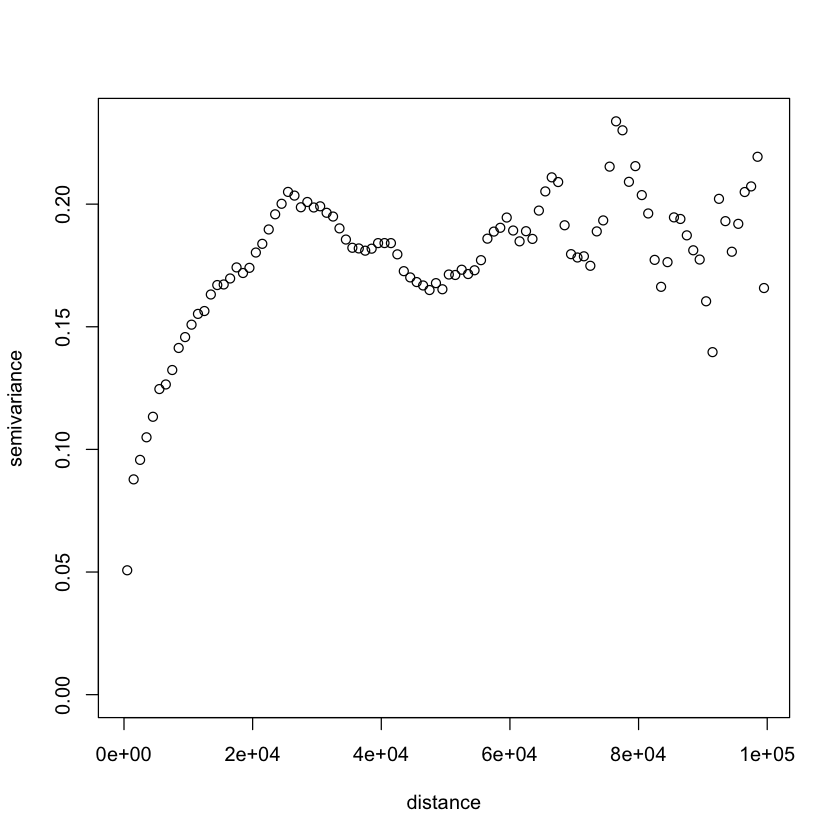

In [92]:
plot(Tucson.variog)

# Fitting hyperparameters
## Fit variogram

In [137]:
Tucson.variog.fit = variofit(Tucson.variog, 
    cov.model="gaussian", 
    ini.cov.pars=c(0.01,20000), 
    nugget=0.1, )

variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 


In [192]:
Tucson.cressie.fit = variofit(Tucson.variog, 
    cov.model="gaussian", 
    weights="cressie",
    ini.cov.pars=c(0.01,20000), 
    nugget=0.11, )

variofit: covariance model used is gaussian 
variofit: weights used: cressie 
variofit: minimisation function used: optim 


In [193]:
Tucson.cressie.fit.2 = variofit(Tucson.variog, 
    cov.model="gaussian", 
    weights="cressie",
    ini.cov.pars=Tucson.variog.fit, 
    nugget=0.11, )

variofit: covariance model used is gaussian 
variofit: weights used: cressie 
variofit: minimisation function used: optim 


In [139]:
Tucson.variog.fit

variofit: model parameters estimated by WLS (weighted least squares):
covariance model is: gaussian
parameter estimates:
     tausq    sigmasq        phi 
    0.0968     0.0891 11270.7762 
Practical Range with cor=0.05 for asymptotic range: 19507.67

variofit: minimised weighted sum of squares = 1163.86

In [140]:
Tucson.cressie.fit

variofit: model parameters estimated by WLS (weighted least squares):
covariance model is: gaussian
parameter estimates:
   tausq  sigmasq      phi 
1.34e-01 5.73e-02 2.00e+04 
Practical Range with cor=0.05 for asymptotic range: 34616.37

variofit: minimised weighted sum of squares = 63468.18

In [195]:
Tucson.cressie.fit.2

variofit: model parameters estimated by WLS (weighted least squares):
covariance model is: gaussian
parameter estimates:
     tausq    sigmasq        phi 
    0.0968     0.0900 11270.7762 
Practical Range with cor=0.05 for asymptotic range: 19507.67

variofit: minimised weighted sum of squares = 36720.01

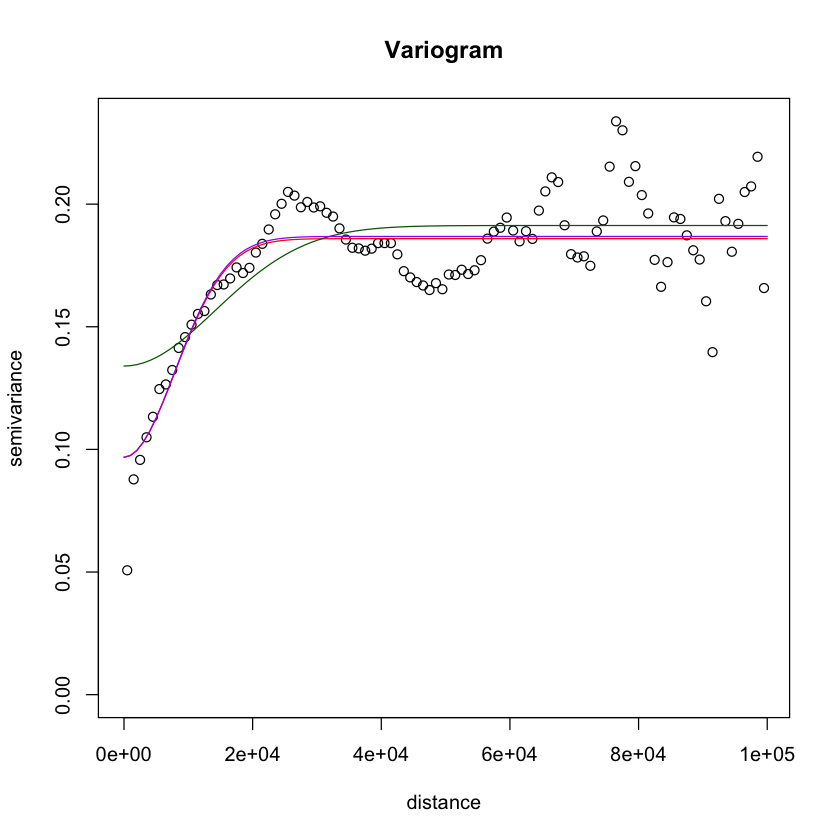

In [197]:
plot(Tucson.variog, main="Variogram")
lines(Tucson.variog.fit, col="red")
lines(Tucson.cressie.fit, col="dark green")
lines(Tucson.cressie.fit.2, col="purple")

Fitting the variogram directly is computationally very efficient, but doesn't seem fully justified from a theoretical standpoint. I'm also not entirely convinced by the implementation of the optimization. With the Cressie weights, $\phi$ remained stuck on 20000. For both, changing the initial parameters has a large effect, which is not a reasonable behavior.

In [165]:
f=variofit(Tucson.variog, cov.model="gaussian", messages=FALSE,
    ini.cov.pars=c(0.01,20000), 
    nugget=0.1, 
    );c(f$nugget, f$cov.pars, f$value)
f=variofit(Tucson.variog, cov.model="gaussian", messages=FALSE,
    ini.cov.pars=c(0.1,20000), 
    nugget=0.1, 
    );c(f$nugget, f$cov.pars, f$value)
f=variofit(Tucson.variog, cov.model="gaussian", messages=FALSE,
    ini.cov.pars=c(0.1,10000),
    nugget=0.1,
    );c(f$nugget, f$cov.pars, f$value)
f=variofit(Tucson.variog, cov.model="gaussian", messages=FALSE,
    ini.cov.pars=c(0.2,11000), 
    nugget=0.01, 
    );c(f$nugget, f$cov.pars, f$value)

[1] 9.681510e-02 8.911495e-02 1.127078e+04 1.163860e+03

[1] 1.358416e-01 5.321389e-02 1.999998e+04 1.890795e+03

[1] 8.863053e-02 9.652221e-02 1.000002e+04 1.192485e+03

[1] 9.513702e-02 9.063399e-02 1.099986e+04 1.165113e+03

## Likelihood fit

I think (hope) this means we're maximizing the marginal likelihood.

In [168]:
Tucson.likfit = likfit(Tucson_geodata, 
    trend="cte", 
    ini.cov.pars=Tucson.variog.fit$cov.pars, 
    nugget=Tucson.variog.fit$nugget,
    cov.model="gaussian",
    print.pars=TRUE,
    realisations=TRUE,
    messages=TRUE,
    limits=pars.limits(phi=c(5000,20000), tausq=c(0.01,0.2), sigmasq=c(0.1,0.3)),
    )

kappa not used for the gaussian correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
     phi    tausq    kappa     psiA     psiR   lambda 
11270.78     0.20     0.50     0.00     1.00     1.00 
log-likelihood =  -923.126919632647 
     phi    tausq    kappa     psiA     psiR   lambda 
11270.78     0.20     0.50     0.00     1.00     1.00 
log-likelihood =  -923.126943040721 
     phi    tausq    kappa     psiA     psiR   lambda 
11270.78     0.20     0.50     0.00     1.00     1.00 
log-likelihood =  -923.126896224568

In [178]:
Tucson.likfit$cov.pars

[1] 7.519574e-01 1.127077e+04

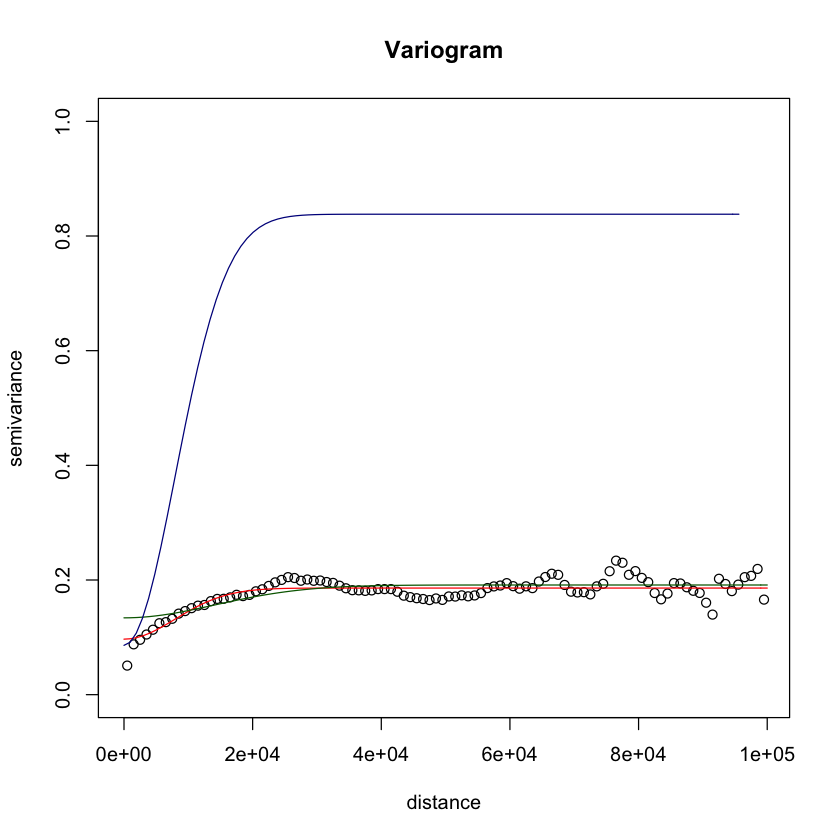

In [181]:
plot(Tucson.variog, main="Variogram", ylim=c(0,1.0))
lines(Tucson.variog.fit, col="red")
lines(Tucson.cressie.fit, col="dark green")
lines(Tucson.likfit, col="dark blue")

The final log-likelihood isn't as high as what we found using the Julia optimization routine, and the fitted value for $\sigma_f^2$ is ridiculous. The result doesn't fit the variogram at all.

## Full Bayesian

In [182]:
tausq.rel.variogfit = Tucson.variog.fit$cov.pars[1] / Tucson.variog.fit$nugget
Tucson.bayes = krige.bayes(Tucson_geodata, 
    model = model.control(
        cov.model="gaussian",
        trend.d="cte",
        ),
    locations="no",
    prior = prior.control(
        phi.discrete=seq(Tucson.variog.fit$cov.pars[2]*0.9, Tucson.variog.fit$cov.pars[2]*1.1, length.out=11),
        phi.prior="reciprocal",
        sigmasq.prior="reciprocal",
        tausq.rel.prior="uniform",
        tausq.rel.discrete=seq(tausq.rel.variogfit*0.5, tausq.rel.variogfit*2.0, length.out=31)
        )
)

krige.bayes: no prediction locations provided.
             Only samples of the posterior for the parameters will be returned.
krige.bayes: computing the discrete posterior of phi/tausq.rel
krige.bayes: computing the posterior probabilities.
             Number of parameter sets:  341 
1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291, 301, 311, 321, 331, 341, 

krige.bayes: sampling from posterior distribution
krige.bayes: sample from the (joint) posterior of phi and tausq.rel
                     1            2           12           23           34
phi       1.014370e+04 1.036911e+04 1.014370e+04 1.014370e+04 1.014370e+04
tausq.rel 4.602327e-01 4.602327e-01 5.062559e-01 5.522792e-01 5.983025e-01
frequency 8.730000e+02 3.000000e+00 1.070000e+02 1.500000e+01 2.000000e+00



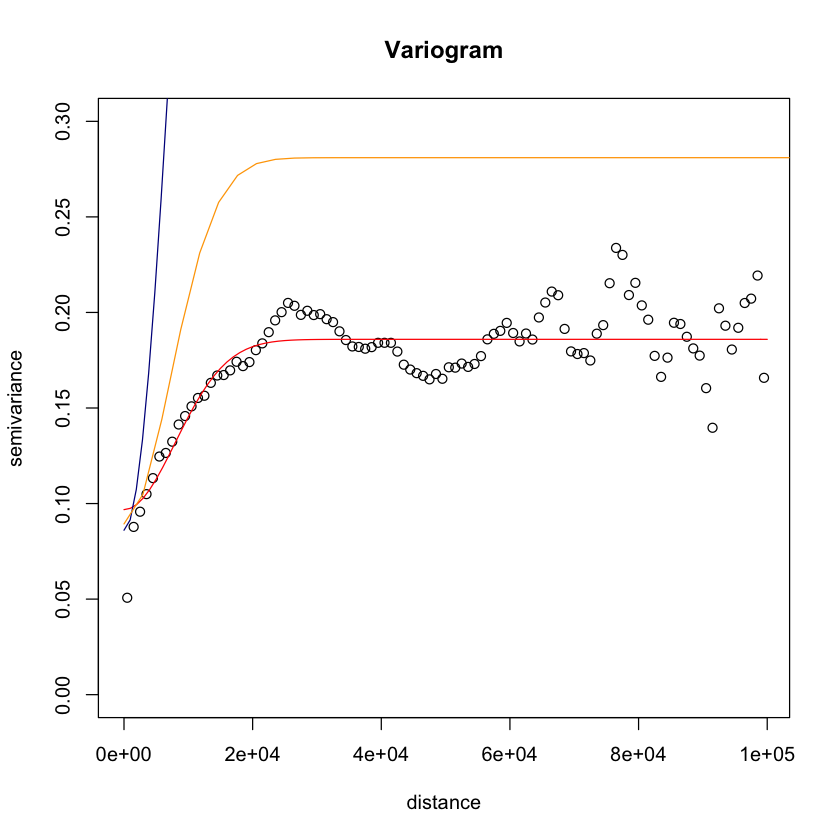

In [201]:
plot(Tucson.variog, main="Variogram", ylim=c(0,0.3))
lines(Tucson.variog.fit, col="red")
lines(Tucson.likfit, col="dark blue")
lines(Tucson.bayes, summary.posterior=mean, col="orange") # posterior mean

The fitted Bayesian variogram (orange) is somewhere halfway between the MLE (blue) and the least squares fit (red). Having read a bit of Diggle's "Model-based Geostatistics", I now believe that maybe the poor variogram fit at high distances is not as big a problem as I thought. The MLE automatically attributes more weight to short distances, which is what we're seeing here.

There might also be some model misspecification here. The model is struggling to fit the zero-distance point, as well as the longer-range correlations. Perhaps a different kernel could be tried and would give better results.